## Initial Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from dataloader import read_activity
import pandas as pd
import numpy as np

/home/gareth/Documents/Uni/2023/cosc470/track_location/keypoint_detection_track.py:63: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  img = torch.Tensor([np_fig[0::3], np_fig[1::3], np_fig[2::3]])   # needs to be in C, H, W format. Image is 1000x1000. Colour RGB


In [7]:
activities = pd.read_csv("data/activities.csv")[["Activity ID", "Activity Date", "Activity Name", "IS_TRACK_WORKOUT", 
                                                    "HAS_ACCURATE_LAPS", "Activity Description", "Elapsed Time", 
                                                    "Distance", "Max Heart Rate", "Filename", "Moving Time",
                                                     "Max Speed", "Average Speed", "Elevation Gain", "TRACK"]]

activities[activities.HAS_ACCURATE_LAPS == 1.0]

,Activity ID,Activity Date,Activity Name,IS_TRACK_WORKOUT,HAS_ACCURATE_LAPS,Activity Description,Elapsed Time,Distance,Max Heart Rate,Filename,Moving Time,Max Speed,Average Speed,Elevation Gain,TRACK
825,2147844352,"Feb 12, 2019, 3:14:17 AM",Track session,1.0,1.0,"3*(600m then 200m with 30 second rest), 1:44, ...",4275,8.03,189.0,activities/2289237041.fit.gz,4218.0,8.200000,NaN,57.048492,old_frankton
827,2147845716,"Feb 14, 2019, 4:09:26 AM",Track session,1.0,1.0,"5*300m (47,50,49,47,45) then 6*200m (28,30,28,...",3763,9.04,188.0,activities/2289237057.fit.gz,2924.0,8.800000,NaN,64.230118,old_frankton
830,2159452990,"Feb 16, 2019, 11:50:55 PM",800m Southland Club Champs,1.0,1.0,"2:07, still very windy",5988,7.95,164.0,activities/2302289075.fit.gz,2701.0,9.000000,NaN,0.000000,other
836,2164067134,"Feb 21, 2019, 4:07:26 AM",Track session,1.0,1.0,"12 min tempo at 3:40 pace, then 4*90sec interv...",3779,9.99,200.0,activities/2307063824.fit.gz,2654.0,7.100000,NaN,71.410820,old_frankton
839,2175885669,"Feb 26, 2019, 3:04:35 AM",Track session,1.0,1.0,"600m, 3*300m then 3*200m at 1:31, 44, 44, 44, ...",4705,9.79,167.0,activities/2319257689.fit.gz,3178.0,9.400000,NaN,70.395714,old_frankton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,8408655136,"Jan 17, 2023, 7:39:56 PM",Track,1.0,1.0,400’s at 63,4249,9.49,187.0,activities/9020005768.fit.gz,3401.0,8.454004,2.792770,227.006668,lane_cove
2054,8416098869,"Jan 19, 2023, 7:41:15 AM",200’s,1.0,1.0,NaN,3855,10.10,189.0,activities/9028217372.fit.gz,3173.0,8.332031,3.183769,350.115692,lane_cove
2059,8446286759,"Jan 24, 2023, 7:43:37 PM",600’s,1.0,1.0,Not so good,4037,7.84,182.0,activities/9061708304.fit.gz,3099.0,8.178027,2.529684,172.842377,lane_cove
2073,8522903907,"Feb 7, 2023, 7:40:09 PM",200’s,1.0,1.0,NaN,3479,8.22,187.0,activities/9147956833.fit.gz,2947.0,8.212011,2.791181,205.572403,lane_cove


## Load a workout

In [18]:
activities[activities.Filename == "activities/5431221291.fit.gz"]

,Activity ID,Activity Date,Activity Name,IS_TRACK_WORKOUT,HAS_ACCURATE_LAPS,Activity Description,Elapsed Time,Distance,Max Heart Rate,Filename,Moving Time,Max Speed,Average Speed,Elevation Gain,TRACK
1463,5094620458,"Apr 5, 2021, 11:14:06 PM",Track,1.0,1.0,200s,2069,4.33,NaN,activities/5431221291.fit.gz,1551.0,8.0,2.796841,0.0,ilam_fields


In [24]:
# https://www.strava.com/activities/5094620458/overview 
points, laps, events = read_activity("data/activities/5431221291.fit")

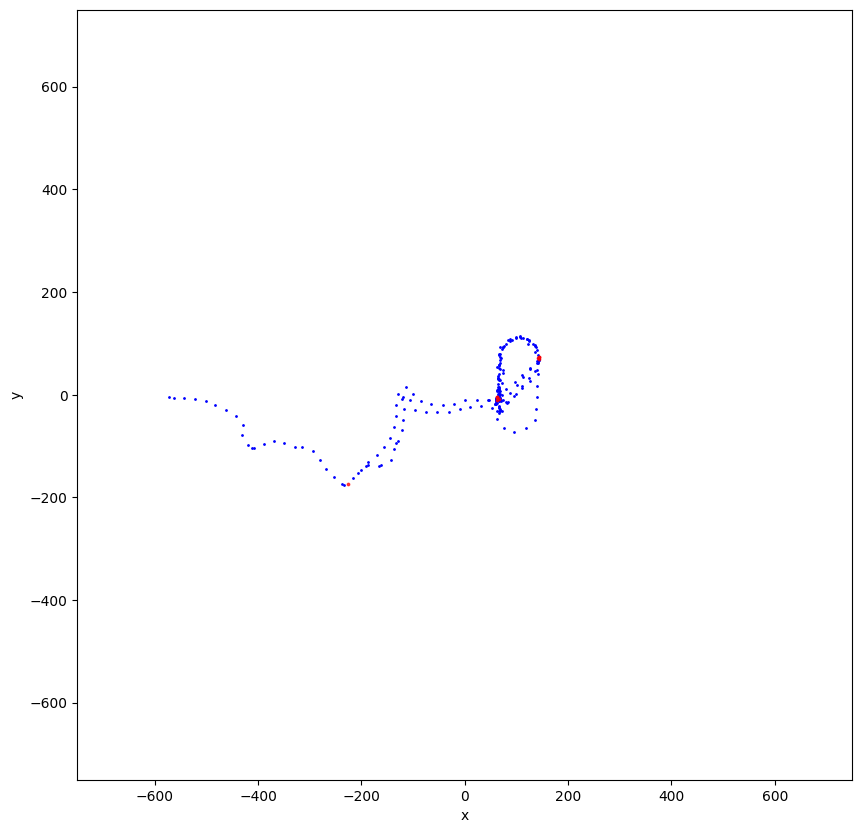

In [28]:
from track_location.track_tools import consistent_scale_plot

# plot of the workout with the laps in red
plot = consistent_scale_plot(points, 
                             reference_points=laps.assign(x=lambda df: df.start_x).assign(y=lambda df: df.start_y),
                             MAP_SIZE=750)

In [21]:
# sample of points
points[100:120]

,Timestamp,speed,cadence,x,y,time_after_start,track_x,track_y,dist_to_track
100,2021-04-05 23:34:13+00:00,1.362,110.0,19.789141,34.067007,1207.0,36.5,34.067007,16.710859
101,2021-04-05 23:34:29+00:00,1.269,101.0,32.824783,44.635893,1223.0,36.399501,44.901713,3.584589
102,2021-04-05 23:34:31+00:00,1.260,102.0,34.655404,46.110652,1225.0,36.269222,46.292995,1.624086
103,2021-04-05 23:34:37+00:00,1.222,0.0,35.338119,51.009116,1231.0,35.41501,51.028294,0.079247
104,2021-04-05 23:34:39+00:00,1.157,0.0,35.812878,50.713842,1233.0,35.509221,50.641611,0.31213
105,2021-04-05 23:34:44+00:00,0.019,122.0,34.802909,52.550182,1238.0,34.984278,52.604146,0.189227
106,2021-04-05 23:34:46+00:00,1.306,122.0,33.472483,60.075386,1240.0,32.194535,59.39273,1.448851
107,2021-04-05 23:34:49+00:00,4.945,122.0,25.643063,77.035137,1243.0,21.636113,71.591065,6.759702
108,2021-04-05 23:34:51+00:00,4.852,122.0,15.002223,85.636042,1245.0,11.914667,76.69559,9.458578
109,2021-04-05 23:34:53+00:00,4.871,122.0,2.135009,90.550172,1247.0,1.610003,78.659474,11.902283


In [17]:
# all laps in the workout
laps

,Timestamp,start_pos_lat,start_pos_long,end_pos_lat,end_pos_long,total_timer_time,total_distance,avg_speed,lap_time,lap_distance,start_x,start_y,end_x,end_y,time_after_start
0,2021-04-05 23:34:44+00:00,-43.524427,172.571987,-43.521856,172.576163,NaN,NaN,1.741,1237.247,2153.65,-321.801049,-210.018190,35.215397,50.812525,1237.247
1,2021-04-05 23:35:14+00:00,-43.521841,172.576156,-43.522591,172.575273,NaN,NaN,6.655,29.740,197.93,34.802909,52.550182,-42.327888,-25.474430,1266.987
2,2021-04-05 23:37:01+00:00,-43.522652,172.575278,-43.521829,172.576152,NaN,NaN,1.561,106.812,166.72,-42.410565,-32.338633,34.544362,53.875464,1373.799
3,2021-04-05 23:37:30+00:00,-43.521808,172.576149,-43.522568,172.57533,NaN,NaN,6.658,29.235,194.65,34.427689,56.236064,-37.552770,-23.285837,1403.034
4,2021-04-05 23:39:09+00:00,-43.522626,172.57534,-43.521829,172.576161,NaN,NaN,1.607,99.272,159.57,-37.271026,-29.802690,35.293835,53.812597,1502.306
5,2021-04-05 23:39:39+00:00,-43.521811,172.576163,-43.522604,172.575284,NaN,NaN,6.652,29.936,199.14,35.555444,55.763467,-41.571774,-26.965925,1532.242
6,2021-04-05 23:41:20+00:00,-43.522604,172.575284,-43.521846,172.57615,NaN,NaN,1.485,100.999,150.03,-41.571774,-26.965925,34.263017,52.028681,1633.241
7,2021-04-05 23:41:49+00:00,-43.521821,172.576144,-43.522543,172.575281,NaN,NaN,6.953,28.494,198.12,33.947874,54.748830,-41.340961,-20.214980,1661.735
8,2021-04-05 23:48:37+00:00,-43.522602,172.575291,-43.523304,172.567483,NaN,NaN,2.260,406.732,919.39,-40.995613,-26.792381,-676.074280,-59.698027,2068.467


## Locating the Athletics Track

In [42]:
from eval_track import KeypointMethod, ConvolutionMethod, optimisation_method, get_known_tracks, angle_diff

uncentered_points, uncentered_laps, events = read_activity("data/activities/5431221291.fit", center_points=False)

# model = optimisation_method
# model = KeypointMethod().cv_method
model = ConvolutionMethod().cv_method

pred_location = model(uncentered_points)
pred_location

[627347.1228931345, 5179972.932401615, 0.10471975511965977]

In [40]:
track_csv_path = "data/known_track_locations.csv"
tracks = get_known_tracks(track_csv_path)

ground_truth_track = tracks["ilam_fields"]

error = (((pred_location[0] - ground_truth_track[0])**2 + (pred_location[1] - ground_truth_track[1])**2)**0.5,
    angle_diff(pred_location[2], ground_truth_track[2]))
error

(5.931919911067092, 0.03429312079507163)

## Predict Lap Times

In [14]:
from models import Acceleration, SlidingWindow

# model = Acceleration()
model = SlidingWindow()

if model.requires_training:
    model.load("sliding_window_model.pkl")

pred = model.predict(points, events=events)
print("Predicted:", pred)
print("Actual:   ", laps.time_after_start.values)

Predicted: [1237.0, 1267.429, 1379.5, 1402.5, 1509.0, 1531.5, 1637.5, 1664.0]
Actual:    [1237.247 1266.987 1373.799 1403.034 1502.306 1532.242 1633.241 1661.735
 2068.467]


In [15]:
from eval import iou, evaluate

print(f"IoU error: {iou(laps.time_after_start.values, pred)}")
precision_recall = evaluate(laps.time_after_start.values, pred)
print(f"Precision error: {precision_recall[0]}")
print(f"Recall error: {precision_recall[1]}")

IoU error: 0.3019337545471946
Precision error: 47.26122222222224
Recall error: 2.6105000000000587
